In [1]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
file_path_csv = 'data/open_llm_leaderboard.csv'
file_path_parquet = 'data/open_llm_leaderboard.parquet'
# df = pd.read_csv(file_path_csv)
df = pd.read_parquet(file_path_parquet, engine='pyarrow')
print(df.head())

                            eval_name Precision  \
0   0-hero_Matter-0.2-7B-DPO_bfloat16  bfloat16   
1           01-ai_Yi-1.5-34B_bfloat16  bfloat16   
2       01-ai_Yi-1.5-34B-32K_bfloat16  bfloat16   
3      01-ai_Yi-1.5-34B-Chat_bfloat16  bfloat16   
4  01-ai_Yi-1.5-34B-Chat-16K_bfloat16  bfloat16   

                                  Type  T Weight type        Architecture  \
0  💬 chat models (RLHF, DPO, IFT, ...)  💬    Original  MistralForCausalLM   
1                         🟢 pretrained  🟢    Original    LlamaForCausalLM   
2                         🟢 pretrained  🟢    Original    LlamaForCausalLM   
3  💬 chat models (RLHF, DPO, IFT, ...)  💬    Original    LlamaForCausalLM   
4  💬 chat models (RLHF, DPO, IFT, ...)  💬    Original    LlamaForCausalLM   

                                               Model  \
0  <a target="_blank" href="https://huggingface.c...   
1  <a target="_blank" href="https://huggingface.c...   
2  <a target="_blank" href="https://huggingface.c...   
3  <a 

## Check for missing values

In [3]:
print(df.isnull().sum())

eval_name                 0
Precision                 0
Type                      0
T                         0
Weight type               0
Architecture              0
Model                     0
fullname                  0
Model sha                 0
Average ⬆️                0
Hub License               0
Hub ❤️                    0
#Params (B)               0
Available on the hub      0
Not_Merged                0
MoE                       0
Flagged                   0
Chat Template             0
IFEval Raw                0
IFEval                    0
BBH Raw                   0
BBH                       0
MATH Lvl 5 Raw            0
MATH Lvl 5                0
GPQA Raw                  0
GPQA                      0
MUSR Raw                  0
MUSR                      0
MMLU-PRO Raw              0
MMLU-PRO                  0
Maintainer's Highlight    0
Upload To Hub Date        0
Submission Date           0
Generation                0
Base Model                0
dtype: int64


## Get a summary of the dataset

In [4]:
print(df.describe())

        Average ⬆️       Hub ❤️  #Params (B)   IFEval Raw       IFEval  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean     19.094292   107.970667    14.567333     0.426802    42.680174   
std       8.416389   390.895783    20.064010     0.190613    19.061342   
min       1.413398     0.000000    -1.000000     0.000000     0.000000   
25%      13.556870     0.000000     7.000000     0.266600    26.660040   
50%      19.705318     3.000000     8.000000     0.421504    42.150383   
75%      23.757714    38.000000    12.000000     0.552939    55.293898   
max      50.778151  5741.000000   140.000000     0.866885    86.688542   

           BBH Raw          BBH  MATH Lvl 5 Raw   MATH Lvl 5     GPQA Raw  \
count  1500.000000  1500.000000     1500.000000  1500.000000  1500.000000   
mean      0.477865    26.447215        0.064567     6.456747     0.291687   
std       0.098037    13.196007        0.070349     7.034900     0.033211   
min       0.275652     0.

## Check column "Submission Date"

In [5]:
# Ensure the 'Submission Date' column is in datetime format
df['Submission Date'] = pd.to_datetime(df['Submission Date'], errors='coerce')

min_date = df['Submission Date'].min()
max_date = df['Submission Date'].max()

print(f"Submission Date range: {min_date} to {max_date}")

Submission Date range: 2024-06-08 00:00:00 to 2024-10-14 00:00:00


## Correlation Analysis (Matplotlib)

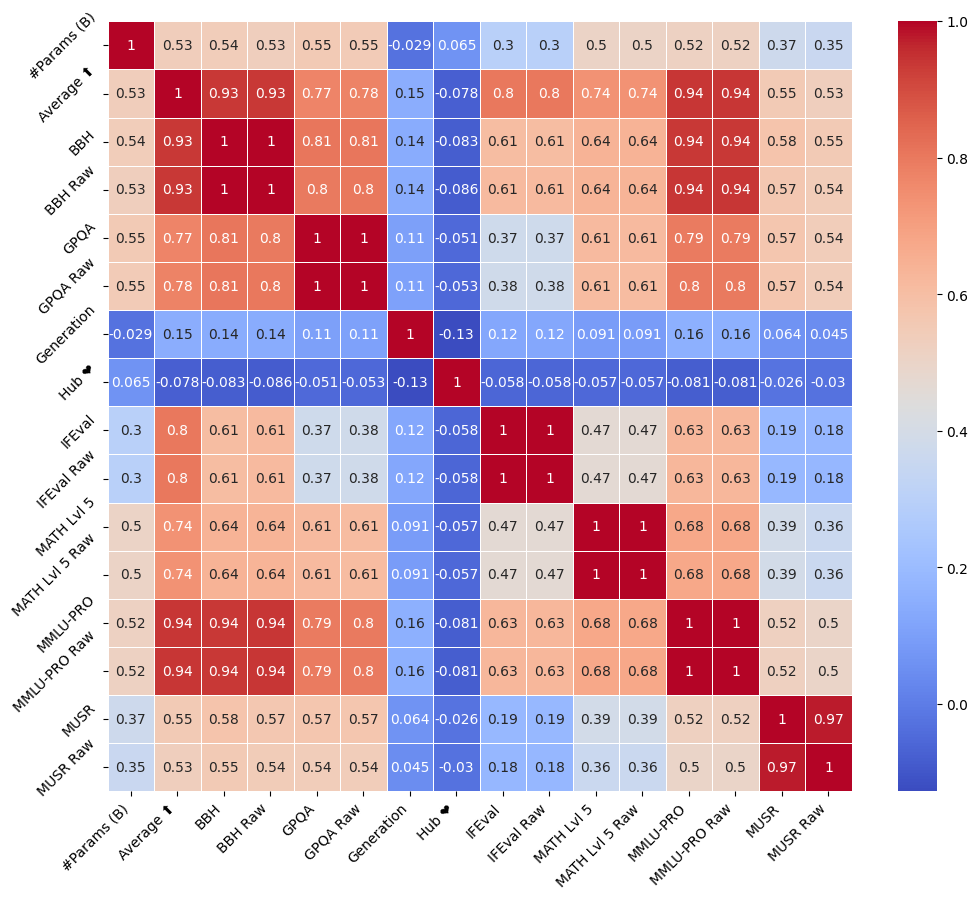

In [6]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix and sort rows and columns alphabetically
correlation_matrix = numeric_df.corr().sort_index().sort_index(axis=1)

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Rotate the x and y axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')  # 'ha' = horizontal alignment
plt.yticks(rotation=45)

plt.show()


## Correlation Analysis (Altair)

In [7]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix and sort rows and columns alphabetically
correlation_matrix = numeric_df.corr().sort_index().sort_index(axis=1)

# Reset the index to transform the matrix into a long format suitable for Altair
correlation_matrix = correlation_matrix.reset_index().melt(id_vars='index')

# Rename the columns for better clarity
correlation_matrix.columns = ['Variable1', 'Variable2', 'Correlation']

heatmap = alt.Chart(correlation_matrix).mark_rect().encode(
    x=alt.X('Variable1:O', title=None, sort='ascending'),  # O: Ordinal data type, sort alphabetically
    y=alt.Y('Variable2:O', title=None, sort='ascending'),
    color=alt.Color('Correlation:Q', scale=alt.Scale(scheme='redblue', reverse=True)),  # Q: Quantitative data type
    tooltip=['Variable1', 'Variable2', 'Correlation']
).properties(
    width=800,
    height=800,
    title='Correlation Matrix Heatmap'
)

# Add text annotations for correlation values
text = alt.Chart(correlation_matrix).mark_text(baseline='middle').encode(
    x=alt.X('Variable1:O', title=None, sort='ascending'),
    y=alt.Y('Variable2:O', title=None, sort='ascending'),
    text=alt.Text('Correlation:Q', format='.3f'),
    color=alt.condition(
        (alt.datum.Correlation >= 0.13) & (alt.datum.Correlation <= 0.7),  # Condition for values in range
        alt.value('black'),  # Text color for correlations in range
        alt.value('white')   # Text color for all other correlations
    )
)

layered_chart = heatmap + text

# Apply the axis configuration to the layered chart
layered_chart = layered_chart.configure_axis(
    labelAngle=-45
)

layered_chart.show()


alt.LayerChart(...)